In [1]:
!pip install matplotlib tensorflow-cpu keras scikit-learn np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 6.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 6.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.7 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 8.5 MB/s eta 0:00:00


In [2]:
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf

2025-07-01 18:02:45.186974: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-01 18:02:45.218422: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-01 18:02:46.756335: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

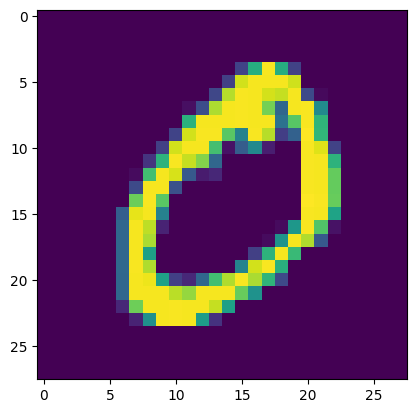

In [5]:
plt.imshow(train_images[1])

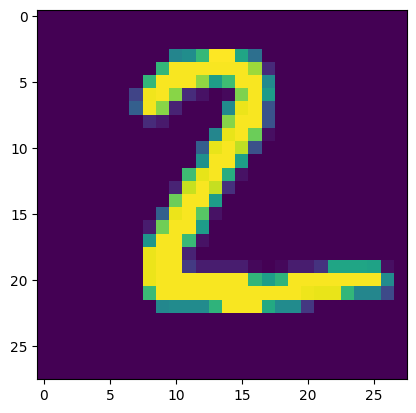

In [6]:
plt.imshow(test_images[1])

In [7]:
train_images, test_images = train_images/255.0, test_images/255.0

In [8]:
import numpy as np
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [9]:
from keras.utils import to_categorical

In [10]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
test_labels[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
cnnmodel = Sequential([Conv2D(32,(3,3),activation = "relu", input_shape=(28,28,1)), 
                      tf.keras.layers.MaxPooling2D(2,2),
                       Conv2D(64, (3,3), activation="relu"),
                       tf.keras.layers.Flatten(),
                       tf.keras.layers.Dense(10, activation = "softmax")
                      ])

/home/mrzenith/Documents/MSc-CS/Deep_Learning/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnnmodel.compile(optimizer="adam", loss = "categorical_crossentropy",metrics=["accuracy"] )

In [15]:
cnnmodel.fit(train_images, train_labels, epochs = 3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9154 - loss: 0.2849
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9862 - loss: 0.0457
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9903 - loss: 0.0296


In [16]:
predictions = cnnmodel.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
for i in range(3):
    print(predictions[i])
    print(test_labels[i])

[2.0659394e-09 1.0598581e-09 1.1223871e-07 2.2640090e-05 1.1494612e-12
 8.8480387e-09 7.5390422e-16 9.9997699e-01 2.0381053e-08 2.3885690e-07]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.7296852e-08 4.4814172e-08 9.9999857e-01 4.2167476e-12 7.3765771e-13
 3.6591376e-13 1.4325669e-06 1.5048490e-10 2.9074275e-08 4.3993667e-12]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[5.9129032e-08 9.9986207e-01 1.3847878e-05 4.1433164e-08 7.1494705e-06
 2.0421052e-07 5.9823429e-07 1.1215472e-04 3.6581489e-06 2.0257980e-07]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
cnnmodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        77,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288,800 (1.10 MB)

 Trainable params: 96,266 (376.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 192,534 (752.09 KB)